In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from typing import Tuple, List

from roidetection import get_field_rois

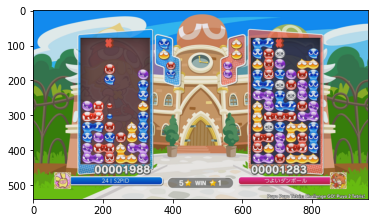

In [2]:
im = Image.open('test-images/amitie_witch.png').convert('RGB')
im = im.resize((960, 540))
im = np.array(im)
plt.imshow(im)
plt.show()

## Player Fields

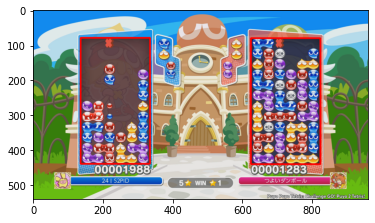

In [3]:
fields = get_field_rois(im)
rect_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in fields]
im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
plt.imshow(im_copy)
plt.show()

## Player Score

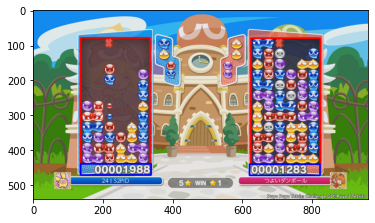

In [4]:
# Assuming the user didn't chop up the game screen, the score areas should be
# right below the field ROIs.
scores = np.copy(fields)
scores[:, 1] += scores[:, 3]
scores[:, 3] = scores[:, 3] // 11 # Height adjustment
scores[1, 0] = scores[1, 0] - scores[1, 2] * 0.02
scores[:, 2] = scores[:, 2] * 1.02 # Width adjustment

score_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in scores]

im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
cv2.drawContours(im_copy, score_contour, -1, (0, 0, 255), 4)
plt.imshow(im_copy)
plt.show()

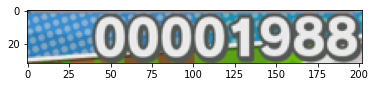

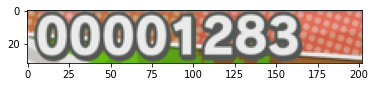

In [5]:
for i in range(2):
    x0, x1 = scores[i, 0], scores[i, 0] + scores[i, 2]
    y0, y1 = scores[i, 1], scores[i, 1] + scores[i, 3]
    p1_score = im[y0:y1, x0:x1]
    plt.imshow(p1_score)
    plt.show()

## Next Window

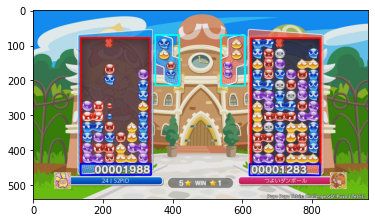

In [6]:
windows = np.copy(fields)

# Player 1 Next Window
windows[0, 0] += fields[0, 2] * 1.08 # Shift right
windows[0, 1] -= fields[0, 3] * 0.02 # Shift up
windows[0, 2] *= 0.35 # Shrink horizontal
windows[0, 3] *= 0.40 # Shrink vertical

# Player 2 Next Window
windows[1, 0] -= fields[0, 2] * 0.08 + windows[1, 2] * 0.35 # Shift left
windows[1, 1] -= fields[0, 3] * 0.02 # Shift up
windows[1, 2] *= 0.35 # Shrink horizontal
windows[1, 3] *= 0.40 # Shrink vertical

window_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in windows]

im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
cv2.drawContours(im_copy, score_contour, -1, (0, 0, 255), 4)
cv2.drawContours(im_copy, window_contour, -1, (0, 255, 255), 4)
plt.imshow(im_copy)
plt.show()

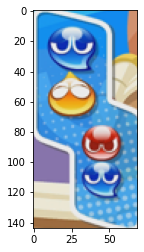

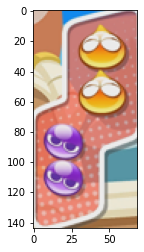

In [7]:
for i in range(2):
    x0, x1 = windows[i, 0], windows[i, 0] + windows[i, 2]
    y0, y1 = windows[i, 1], windows[i, 1] + windows[i, 3]
    window = im[y0:y1, x0:x1]
    plt.imshow(window)
    plt.show()

## Player Names

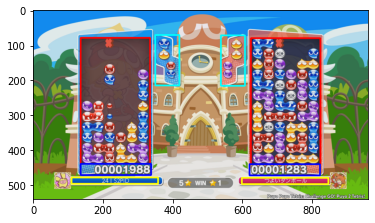

In [8]:
names = np.copy(fields)

names[:, 1] = names[:, 1] + fields[:, 3] * 1.11 # Shift down
names[:, 3] = fields[:, 3] * 0.05 # Height adjustment
names[:, 0] = fields[:, 0] - fields[:, 2] * 0.13
names[:, 2] = fields[:, 2] * 1.25 # Width adjustment

name_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in names]

im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
cv2.drawContours(im_copy, score_contour, -1, (0, 0, 255), 4)
cv2.drawContours(im_copy, window_contour, -1, (0, 255, 255), 4)
cv2.drawContours(im_copy, name_contour, -1, (255, 255, 0), 4)
plt.imshow(im_copy)
plt.show()

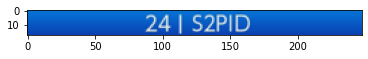

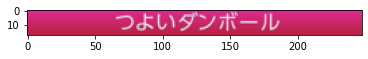

In [9]:
for i in range(2):
    x0, x1 = names[i, 0], names[i, 0] + names[i, 2]
    y0, y1 = names[i, 1], names[i, 1] + names[i, 3]
    name = im[y0:y1, x0:x1]
    plt.imshow(name)
    plt.show()

## Win Counter

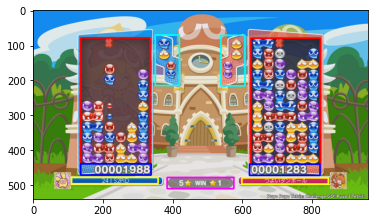

In [10]:
wins = np.copy(fields[0]).reshape(1, -1)

wins[0, 0] = fields[0, 0] + fields[0, 2] * 1.25
wins[0, 1] = fields[0, 1] + fields[0, 3] * 1.11
wins[0, 2] = fields[0, 2] * 0.96
wins[0, 3] = fields[0, 3] * 0.09

win_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in wins]

im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
cv2.drawContours(im_copy, score_contour, -1, (0, 0, 255), 4)
cv2.drawContours(im_copy, window_contour, -1, (0, 255, 255), 4)
cv2.drawContours(im_copy, name_contour, -1, (255, 255, 0), 4)
cv2.drawContours(im_copy, win_contour, -1, (255, 0, 255), 4)
plt.imshow(im_copy)
plt.show()

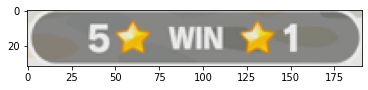

In [11]:
i = 0
x0, x1 = wins[i, 0], wins[i, 0] + wins[i, 2]
y0, y1 = wins[i, 1], wins[i, 1] + wins[i, 3]
win = im[y0:y1, x0:x1]
plt.imshow(win)
plt.show()

## Character Icon

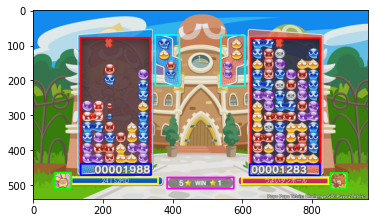

In [12]:
icons = np.copy(fields)

icons[0, 0] = fields[0, 0] - fields[0, 2] * 0.37
icons[0, 1] = fields[0, 1] + fields[0, 3] * 1.07
icons[0, 2] = fields[0, 2] * 0.24
icons[0, 3] = fields[0, 3] * 0.13

icons[1, 0] = fields[1, 0] + fields[0, 2] * 1.39 - fields[1, 2] * 0.24
icons[1, 1] = fields[1, 1] + fields[0, 3] * 1.07
icons[1, 2] = fields[1, 2] * 0.24
icons[1, 3] = fields[1, 3] * 0.13

icon_contour = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in icons]

im_copy = np.copy(im[..., :3])
cv2.drawContours(im_copy, rect_contour, -1, (255, 0, 0), 4)
cv2.drawContours(im_copy, score_contour, -1, (0, 0, 255), 4)
cv2.drawContours(im_copy, window_contour, -1, (0, 255, 255), 4)
cv2.drawContours(im_copy, name_contour, -1, (255, 255, 0), 4)
cv2.drawContours(im_copy, win_contour, -1, (255, 0, 255), 4)
cv2.drawContours(im_copy, icon_contour, -1, (0, 255, 0), 4)
plt.imshow(im_copy)
plt.show()

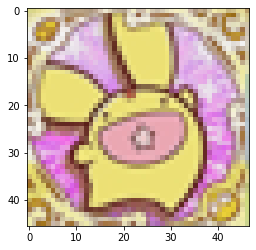

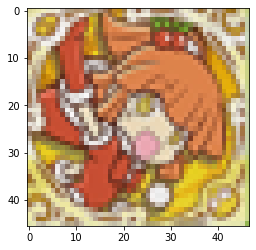

In [13]:
for i in range(2):
    x0, x1 = icons[i, 0], icons[i, 0] + icons[i, 2]
    y0, y1 = icons[i, 1], icons[i, 1] + icons[i, 3]
    icon = im[y0:y1, x0:x1]
    plt.imshow(icon)
    plt.show()

## Background Mask

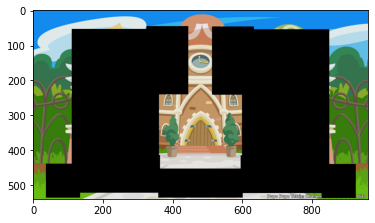

In [14]:
im_copy = np.zeros(im.shape[0:2])
cv2.drawContours(im_copy, rect_contour, -1, 255, -1)
cv2.drawContours(im_copy, score_contour, -1, 255, -1)
cv2.drawContours(im_copy, window_contour, -1, 255, -1)
cv2.drawContours(im_copy, name_contour, -1, 255, -1)
cv2.drawContours(im_copy, win_contour, -1, 255, -1)
cv2.drawContours(im_copy, icon_contour, -1, 255, -1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))
im_copy = cv2.dilate(im_copy, kernel, iterations = 5)
im_copy = 255 - im_copy
background = np.copy(im)
background[im_copy == 0] = 0
plt.imshow(background)
plt.show()

## Helper Functions

In [17]:
def get_score_rois(field_rois: np.ndarray) -> np.ndarray:
    score_rois = np.copy(field_rois)
    score_rois[:, 1] += field_rois[:, 3]
    score_rois[:, 3] = field_rois[:, 3] // 11 # Height adjustment
    score_rois[1, 0] = field_rois[1, 0] - field_rois[1, 2] * 0.02
    score_rois[:, 2] = field_rois[:, 2] * 1.02 # Width adjustment
    
    return scores

def get_next_rois(field_rois: np.ndarray) -> np.ndarray:
    window_rois = np.copy(field_rois)

    # Player 1 Next Window
    window_rois[0, 0] += field_rois[0, 2] * 1.08 # Shift right
    window_rois[0, 1] -= field_rois[0, 3] * 0.02 # Shift up
    window_rois[0, 2] *= 0.35 # Shrink horizontal
    window_rois[0, 3] *= 0.40 # Shrink vertical

    # Player 2 Next Window
    window_rois[1, 0] -= field_rois[0, 2] * 0.08 + field_rois[1, 2] * 0.35 # Shift left
    window_rois[1, 1] -= field_rois[0, 3] * 0.02 # Shift up
    window_rois[1, 2] *= 0.35 # Shrink horizontal
    window_rois[1, 3] *= 0.40 # Shrink vertical

    return window_rois

def get_name_rois(field_rois: np.ndarray) -> np.ndarray:
    name_rois = np.copy(field_rois)

    name_rois[:, 1] = field_rois[:, 1] + field_rois[:, 3] * 1.11 # Shift down
    name_rois[:, 3] = field_rois[:, 3] * 0.05 # Height adjustment
    name_rois[:, 0] = field_rois[:, 0] - field_rois[:, 2] * 0.13
    name_rois[:, 2] = field_rois[:, 2] * 1.25 # Width adjustment

    return name_rois

def get_win_roi(field_rois: np.ndarray) -> np.ndarray:
    win_roi = np.copy(field_rois[0]).reshape(1, -1)

    win_roi[0, 0] = field_rois[0, 0] + field_rois[0, 2] * 1.25
    win_roi[0, 1] = field_rois[0, 1] + field_rois[0, 3] * 1.11
    win_roi[0, 2] = field_rois[0, 2] * 0.96
    win_roi[0, 3] = field_rois[0, 3] * 0.09

    return win_roi

def get_icon_rois(field_rois: np.ndarray) -> np.ndarray:
    icon_rois = np.copy(field_rois)

    icon_rois[0, 0] = field_rois[0, 0] - field_rois[0, 2] * 0.37
    icon_rois[0, 1] = field_rois[0, 1] + field_rois[0, 3] * 1.07
    icon_rois[0, 2] = field_rois[0, 2] * 0.24
    icon_rois[0, 3] = field_rois[0, 3] * 0.13

    icon_rois[1, 0] = field_rois[1, 0] + field_rois[0, 2] * 1.39 - field_rois[1, 2] * 0.24
    icon_rois[1, 1] = field_rois[1, 1] + field_rois[0, 3] * 1.07
    icon_rois[1, 2] = field_rois[1, 2] * 0.24
    icon_rois[1, 3] = field_rois[1, 3] * 0.13

    return icon_rois

def get_background_mask(im, field_rois, score_rois, next_rois, name_rois, win_roi, icon_rois):
    mask = np.zeros(im.shape[0:2], dtype=np.uint8)

    field_contours = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in field_rois]
    score_contours = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in score_rois]
    next_contours  = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in next_rois]
    name_contours  = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in name_rois]
    win_contour    = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in win_roi]
    icon_contours  = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in icon_rois]

    cv2.drawContours(mask, field_contours, -1, 255, -1)
    cv2.drawContours(mask, score_contours, -1, 255, -1)
    cv2.drawContours(mask, next_contours, -1, 255, -1)
    cv2.drawContours(mask, name_contours, -1, 255, -1)
    cv2.drawContours(mask, win_contour, -1, 255, -1)
    cv2.drawContours(mask, icon_contours, -1, 255, -1)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11,11))
    mask = cv2.dilate(mask, kernel, iterations = 5)
    mask = 255 - mask
    return mask

def draw_rois(im, roi_sets):
    im_copy = np.copy(im[..., :3])

    for roi_set in roi_sets:
        contours = [np.array([[[x, y]], [[x, y + h]], [[x + w, y + h]], [[x + w, y]]]) for x, y, w, h in roi_set]
        cv2.drawContours(im_copy, contours, -1, (255, 0, 0), 5)
    
    return im_copy

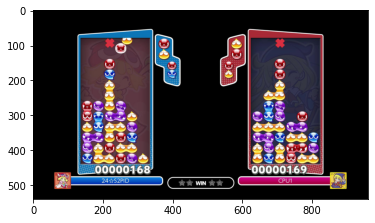

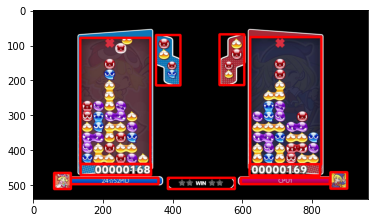

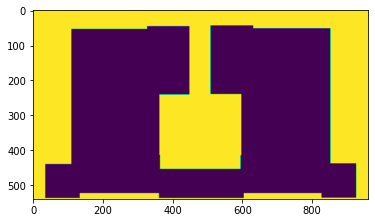

In [20]:
im = Image.open('test-images/amitie_witch2.jpg').convert('RGB')
im = im.resize((960, 540))
im = np.array(im)
plt.imshow(im)
plt.show()

field_rois = get_field_rois(im)
score_rois = get_score_rois(field_rois)
next_rois = get_next_rois(field_rois)
name_rois = get_name_rois(field_rois)
win_roi = get_win_roi(field_rois)
icon_rois = get_icon_rois(field_rois)
background_mask = get_background_mask(im, field_rois, score_rois, next_rois, name_rois, win_roi, icon_rois)

im_roi = draw_rois(im, [field_rois, score_rois, next_rois, name_rois, win_roi, icon_rois])
plt.imshow(im_roi)
plt.show()

plt.imshow(background_mask)
plt.show()